**Group**- AML GROUP 27

**Assignment Dataset**- Anomaly dataset

**Group Members**-

    - Joy Mukerjee(2022DC04311)
    - Swati Muley(2022DC04455)
    - Ganansoundari N(2022DC04265)
    - Hariharan N(2022DC04175)


# **1. Import Libraries/Dataset**
1.	**Download the dataset**
2.	**Import the required libraries**


In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, learning_curve, KFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Ignore all warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

# Assuming you're downloading the dataset from a URL
url = "/content/Anomaly.csv"

# Read the dataset into a pandas DataFrame
dataset = pd.read_csv(url)

# Display the first few rows of the dataset for a sanity check
print("First few rows of the dataset:")
print(tabulate(dataset.head(), headers='keys', tablefmt='fancy_grid'))


First few rows of the dataset:
╒════╤════════════╤═════════════════╤═══════════╤════════╤═════════════╤═════════════╤════════╤══════════════════╤═══════╤═════════════════════╤═════════════╤═══════════════════╤══════════════╤════════════════╤════════════╤══════════════════════╤══════════════╤════════════════════╤═════════════════════╤══════════════════╤═════════╤═════════════╤═══════════════╤═══════════════════╤═══════════════╤═══════════════════╤═════════════════╤═════════════════╤══════════════════════╤══════════════════╤══════════════════════╤══════════════════════════╤══════════════════════════╤═══════════════════════════════╤═══════════════════════════════╤════════════════════════╤════════════════════════════╤════════════════════════╤════════════════════════════╤═════════╕
│    │   duration │ protocol_type   │ service   │ flag   │   src_bytes │   dst_bytes │   land │   wrong_fragment │   hot │   num_failed_logins │   logged_in │   num_compromised │   root_shell │   su_attempted │  

# **Data Visualization and Exploration**
1.	Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them.
2.	Comment on class imbalance with appropriate visualization method.
3.	Provide appropriate visualizations to get an insight about the dataset.
4.	Do the correlational analysis on the dataset. Provide a visualization for the same. Will this correlational analysis have an effect on feature selection that you will perform in the next step? Justify your answer. Answers without justification will not be awarded marks.
5.	Any other visualization specific to the problem statement.

 **1. Printing 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them.**

In [2]:
# Printing the first two rows of the dataset
print("First two rows of the dataset:")
print(tabulate(dataset.head(2), headers='keys', tablefmt='fancy_grid'))

# Checking if the target matches with the features
print("Columns in the dataset:")
print(tabulate([dataset.columns], headers='keys', tablefmt='fancy_grid'))


First two rows of the dataset:
╒════╤════════════╤═════════════════╤═══════════╤════════╤═════════════╤═════════════╤════════╤══════════════════╤═══════╤═════════════════════╤═════════════╤═══════════════════╤══════════════╤════════════════╤════════════╤══════════════════════╤══════════════╤════════════════════╤═════════════════════╤══════════════════╤═════════╤═════════════╤═══════════════╤═══════════════════╤═══════════════╤═══════════════════╤═════════════════╤═════════════════╤══════════════════════╤══════════════════╤══════════════════════╤══════════════════════════╤══════════════════════════╤═══════════════════════════════╤═══════════════════════════════╤════════════════════════╤════════════════════════════╤════════════════════════╤════════════════════════════╤═════════╕
│    │   duration │ protocol_type   │ service   │ flag   │   src_bytes │   dst_bytes │   land │   wrong_fragment │   hot │   num_failed_logins │   logged_in │   num_compromised │   root_shell │   su_attempted │  

**2. Visualizing class imbalance and commenting on the visualization**

<Axes: xlabel='class', ylabel='count'>

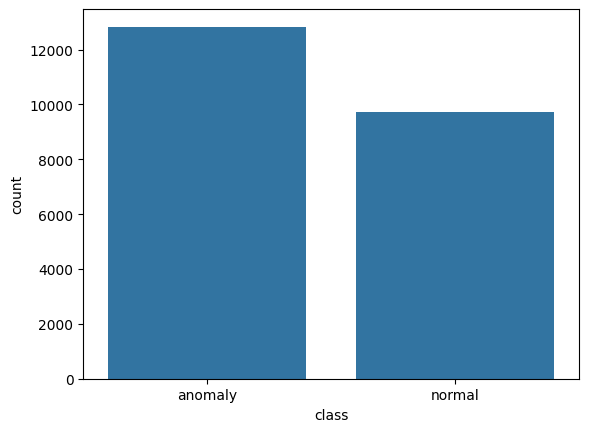

In [3]:
# Visualizing class imbalance
sns.countplot(x='class', data=dataset)

*The dataset exhibits class imbalance, with the 'anomaly' class comprising over 12,000 instances, while the 'normal' class contains fewer than 10,000 instances. Class imbalances can potentially impact the performance of machine learning models, as they may be biased towards the majority class and struggle to accurately predict the minority class. It is essential to address this class imbalance during preprocessing or model training to ensure fair and effective model performance.*

**3. Providing appropriate visualizations to get insight about the dataset**

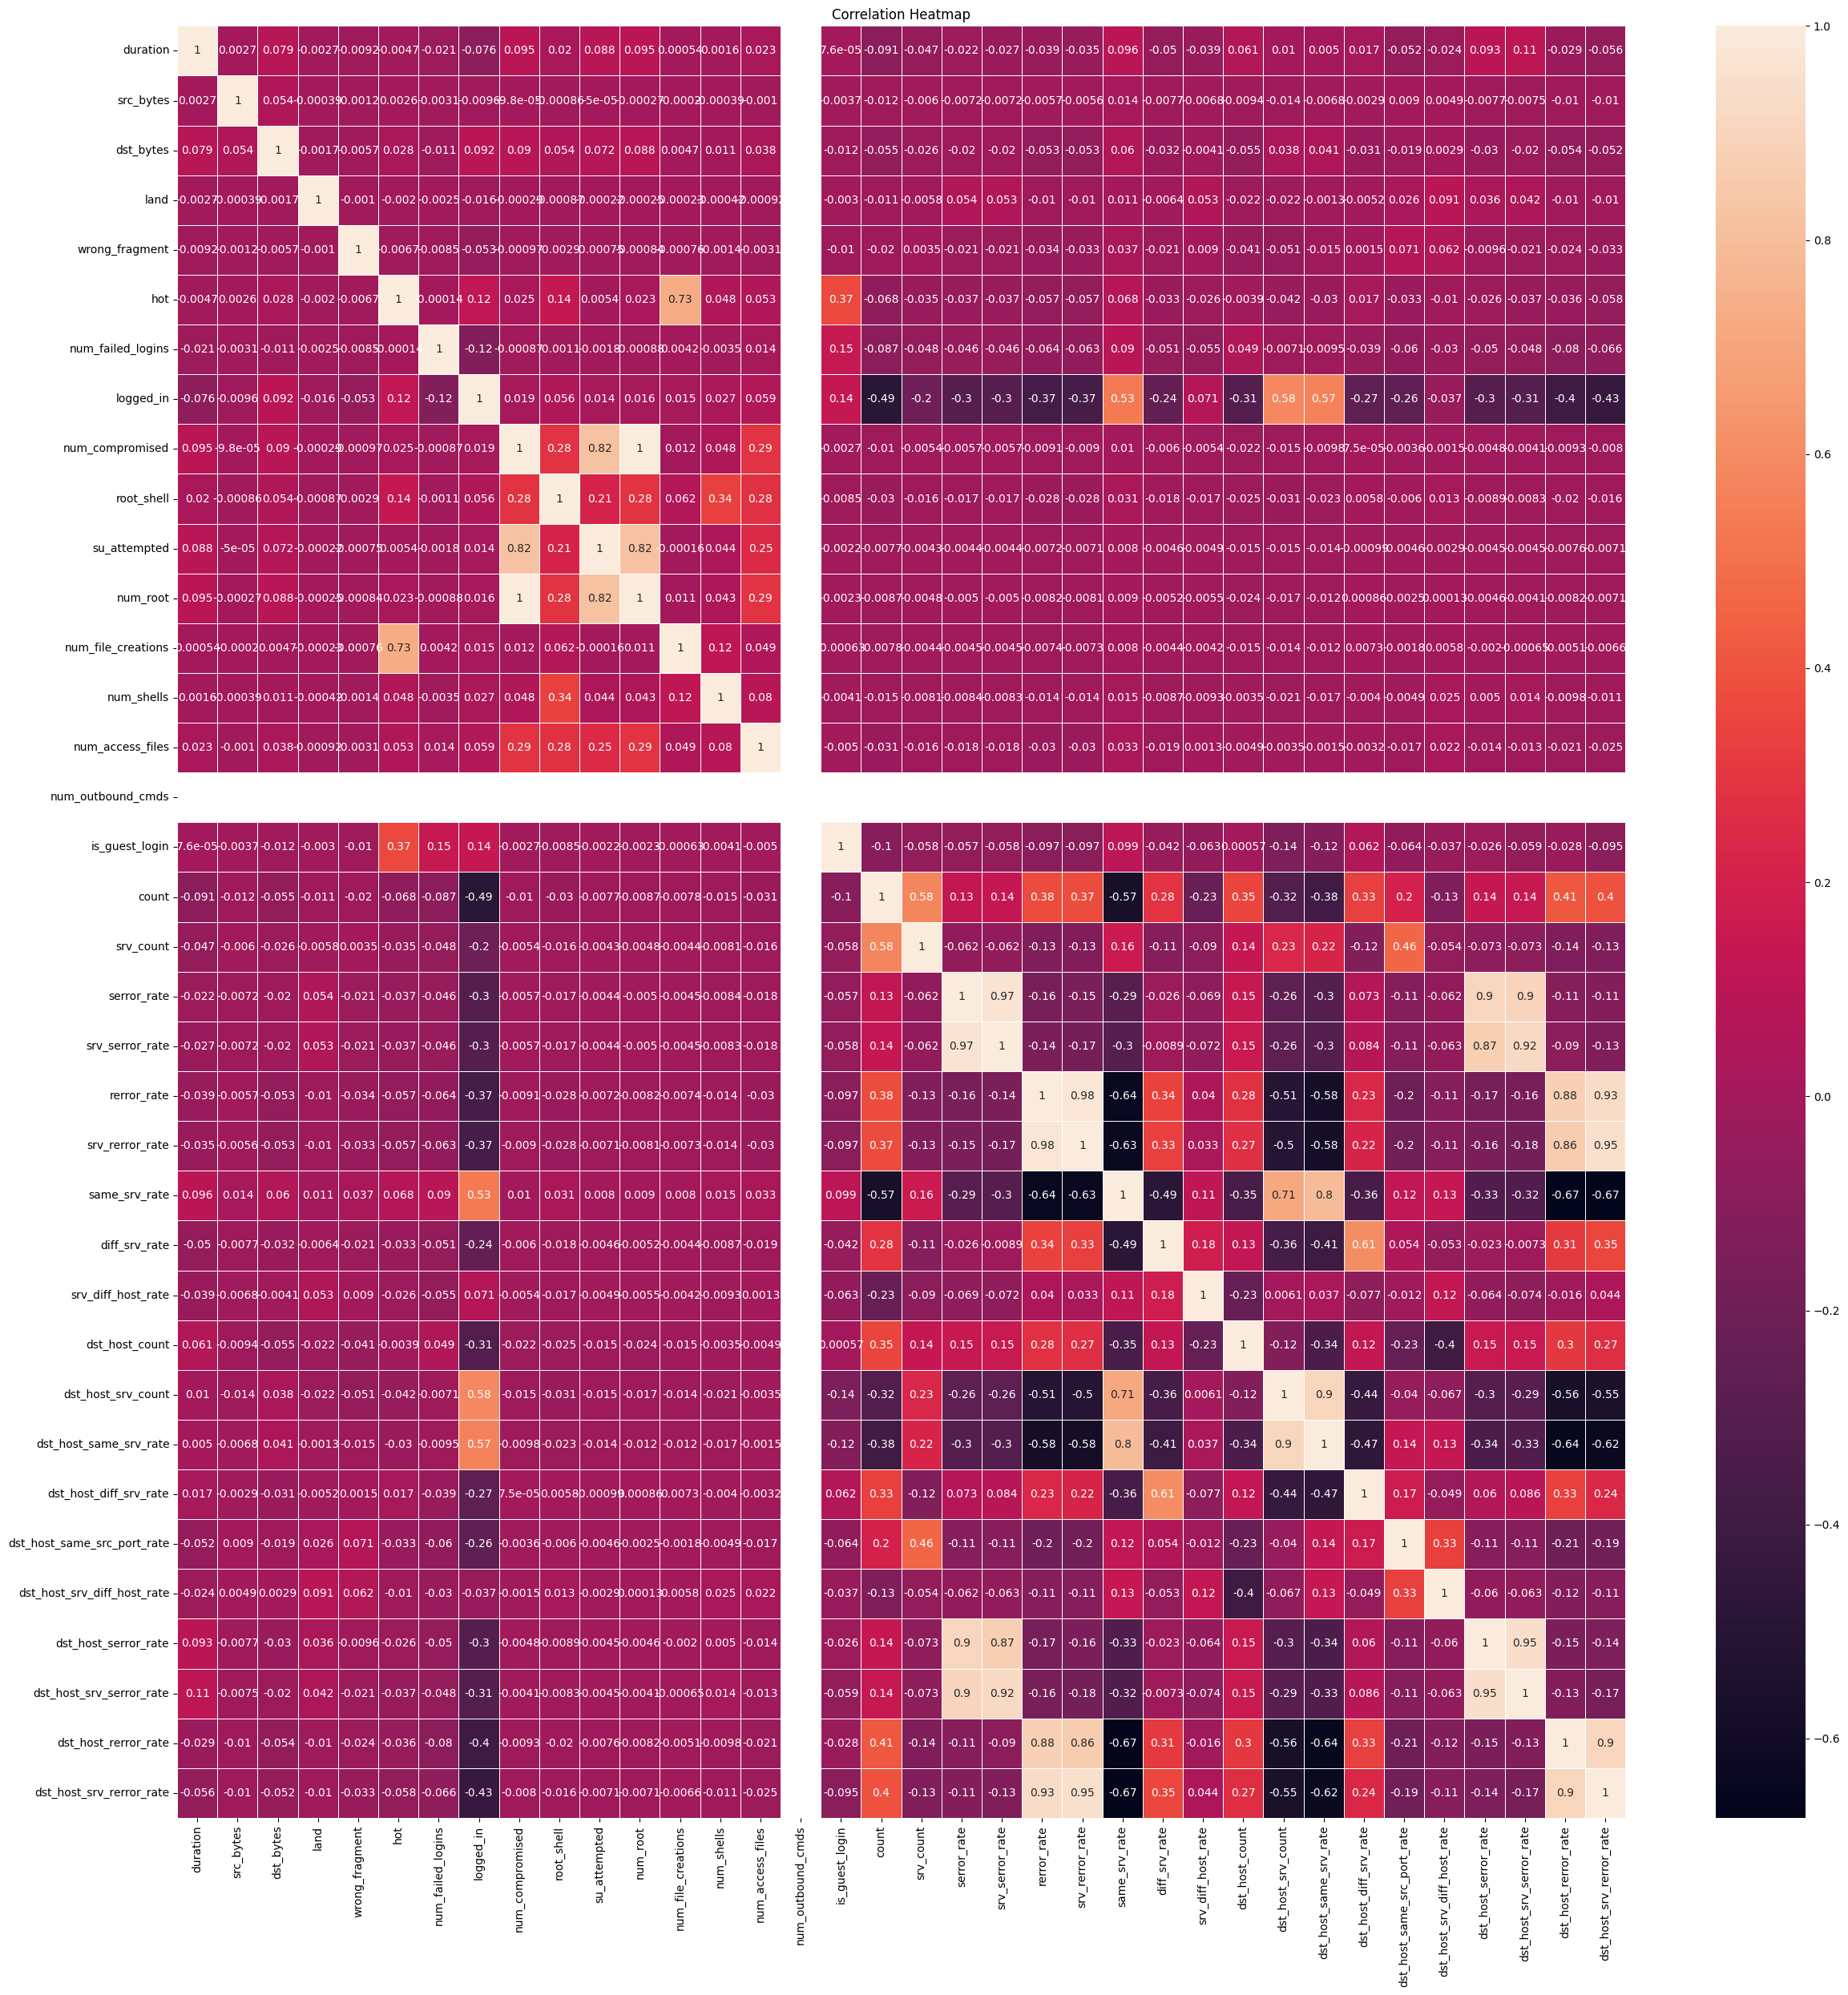

<Axes: xlabel='protocol_type', ylabel='count'>

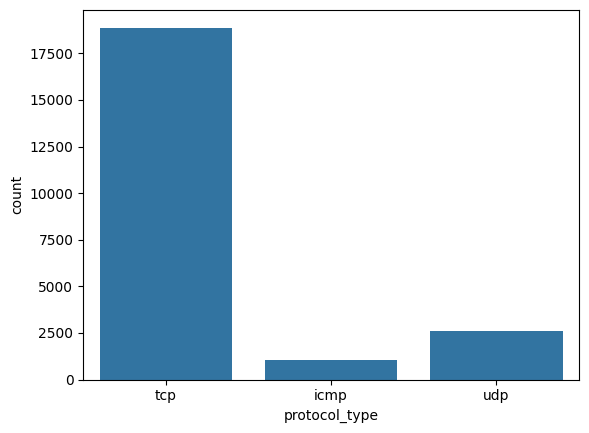

In [4]:
# Creating appropriate visualizations to get an insight about the dataset

# 1. Correlational analysis
fig, ax = plt.subplots(figsize=(25,25))
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, linewidths=.5, ax=ax)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# 2. Visualizing distribution of categorical features
sns.countplot(x='protocol_type', data=dataset)


**4. Doing a correlational analysis on the dataset, providing visualization and justification on how it will have an effect on feature selection**

<Axes: >

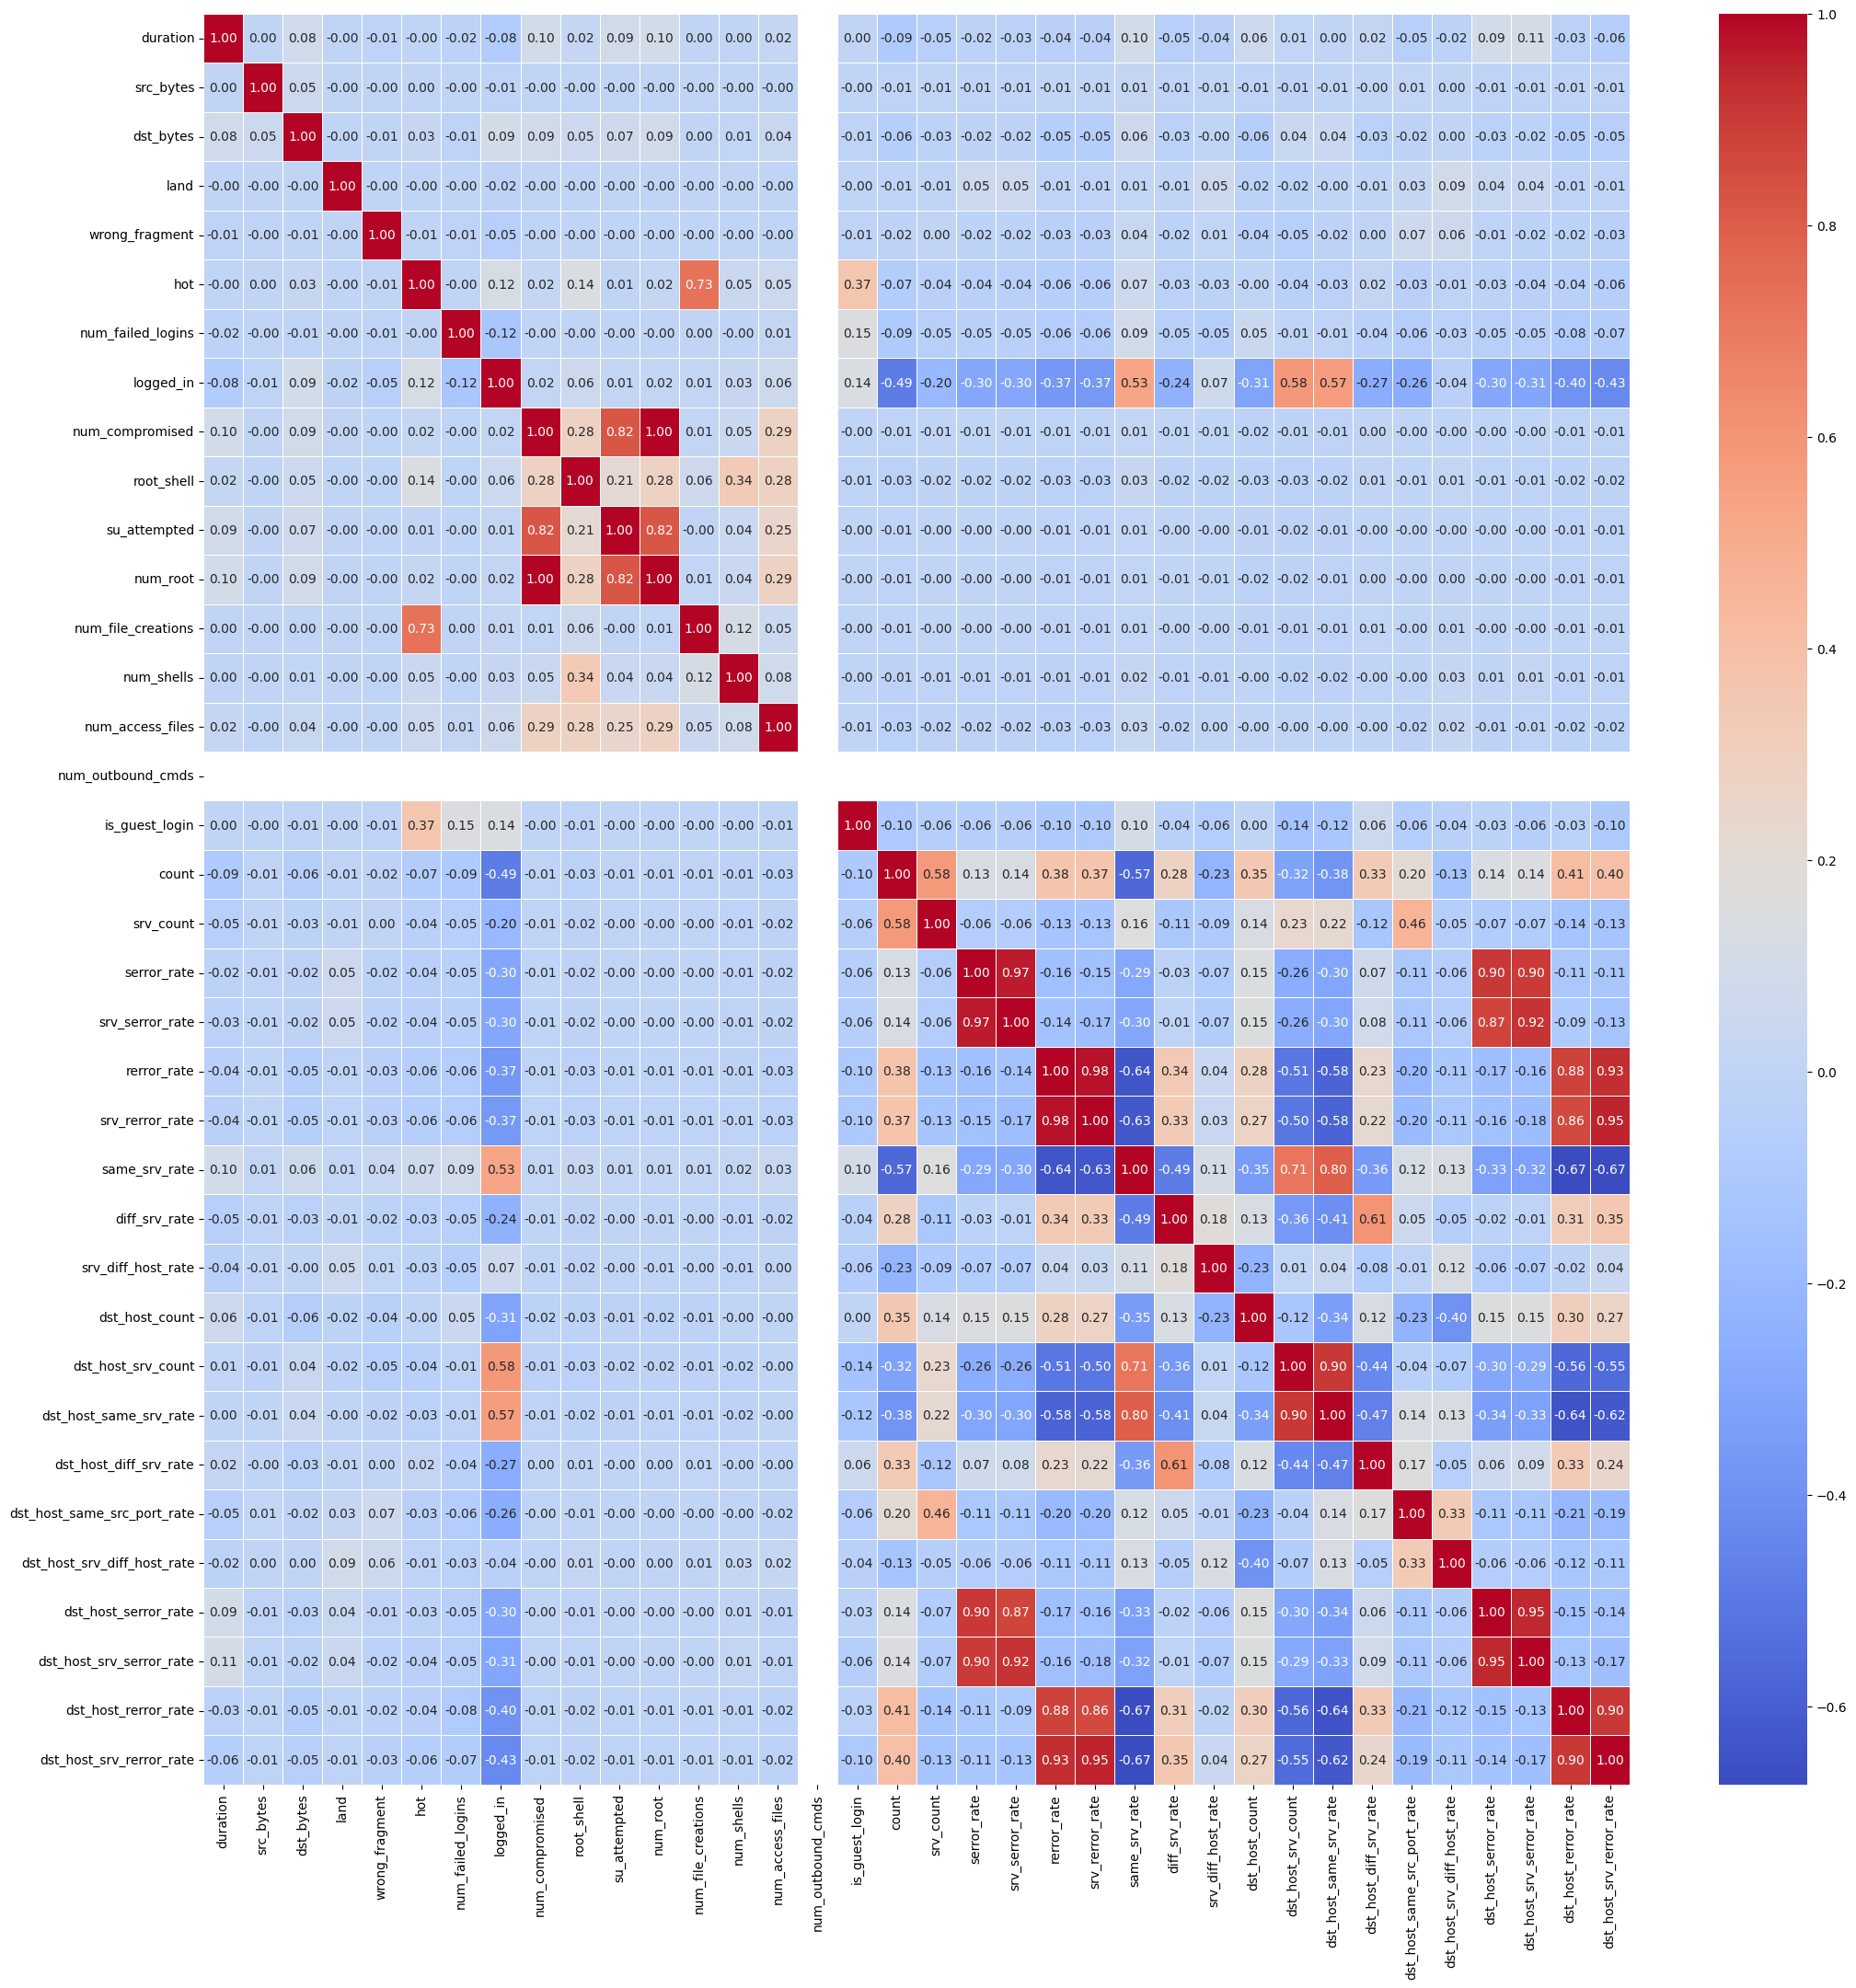

<Figure size 1200x800 with 0 Axes>

In [5]:
# Performing Correlational analysis on the dataset.
correlation_matrix = dataset.corr()

# Visualize the correlation matrix
fig, ax = plt.subplots(figsize=(25,25))
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax=ax)


*The visualization above will absolutely have an effect in feature selection and will somehow drive the process of feature selection. However, before we go into feature selection there are some criteria which we will be using to identify what feature to work with and how should we base the selection:*
1. *High correlation (close to 1 or -1) between two features suggests that they may provide redundant information. In feature selection, it's desirable to keep only one feature from highly correlated pairs to avoid multicollinearity, which can lead to unstable model estimates and overfitting.*
2. *After spotting clusters of highly correlated features, we will remove one feature from each correlated pair, thereby reducing the dimensionality of the dataset while retaining the most relevant information.*
3. *Eliminating redundant features identified through the correlation matrix heatmap above, will improve the performance of machine learning models. Reducing the number of features can prevent overfitting, improve model interpretability, and reduce computational overhead.*

**5. Other visualizations specific to the problem statement**

*Boxplot- which can help us identify outliers in numerical features, which are values that significantly deviate from the rest of the data. Outliers can sometimes indicate errors in the data or provide valuable insights into rare events. For example in this case we have taken the numerical attribute* **rerror_rate** *to identify how much significance it holds within the dataset in terms of values.*

<Axes: xlabel='rerror_rate'>

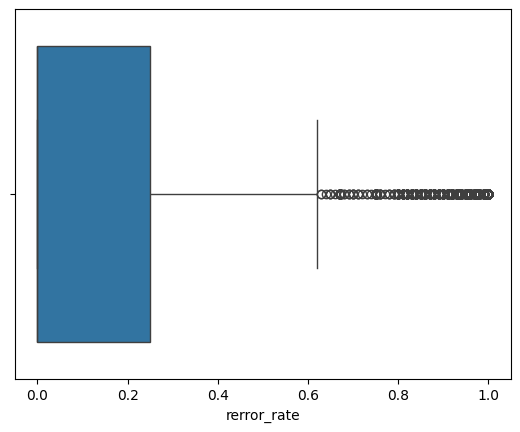

In [6]:
# Example boxplot for a numerical feature
sns.boxplot(x='rerror_rate', data=dataset)

*Histograms- which can help visualizing the distribution of numerical features, providing insights into the data's central tendency, spread, and skewness. In this case we have considered* **srv_count** *as one of the feature to identify its spread and skewness. From the below we can clearly state that we have Right Skewed or positively skewed distribution of the* **srv_count** *feature in the dataset*

<Axes: xlabel='srv_count', ylabel='Count'>

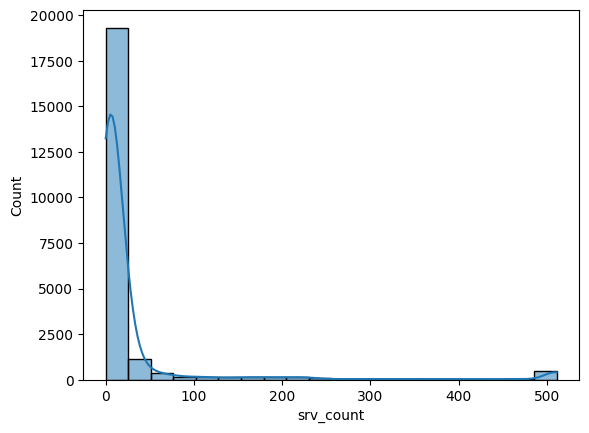

In [7]:
# Example histogram for a numerical feature
sns.histplot(x='srv_count', data=dataset, bins=20, kde=True)

*Barplots- are very helpful to visualize the distribution of categorical features, providing insights into the frequency of different categories. Here we have picked up the* **flag** *feature to analyse its distribution across the dataset. We can clearly see that the* **flag SF** *is the most distributed feature we have.*

<Axes: xlabel='flag', ylabel='count'>

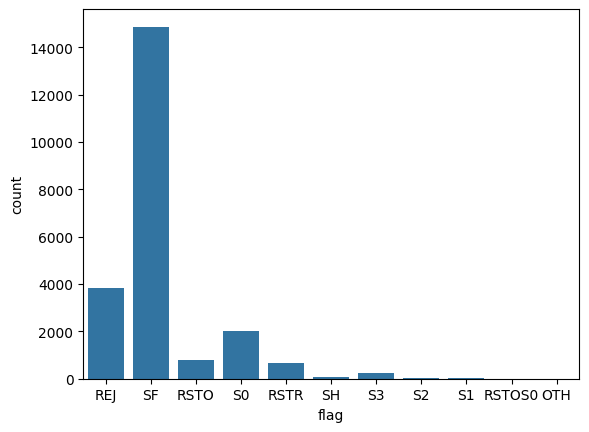

In [8]:
# Example bar plot for a categorical feature
sns.countplot(x='flag', data=dataset)

# **2. Data Pre-processing and training**

**1. Applying appropriate pre-processing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc. Mention the pre-processing steps performed and exploring a few latest data balancing tasks and its effect on model evaluation parameters**

*We will begin with calculating skewness of the numerical features in the dataset. After identifying the skewness we can proceed towards applying the Log Transformation to reduce the skewness and make the data more suitable for modelling*

In [9]:
# Calculate skewness for numerical features
skewness = dataset.select_dtypes(include=['int', 'float']).apply(lambda x: x.skew())
# Create a DataFrame with column names "Features" and "Skewness"
skewness_table = pd.DataFrame({'Features': skewness.index, 'Skewness': skewness.values})
print("Skewness for numerical features:")
print(skewness_table)

Skewness for numerical features:
                       Features    Skewness
0                      duration   15.452797
1                     src_bytes  117.485536
2                     dst_bytes   47.502505
3                          land   56.727418
4                wrong_fragment   19.252929
5                           hot   63.456582
6             num_failed_logins    7.739911
7                     logged_in    0.232768
8               num_compromised   91.496895
9                    root_shell   20.172940
10                 su_attempted   85.453186
11                     num_root   91.225425
12           num_file_creations  143.239592
13                   num_shells   65.657216
14             num_access_files   25.715871
15            num_outbound_cmds    0.000000
16               is_guest_login    5.674821
17                        count    1.909295
18                    srv_count    4.354429
19                  serror_rate    2.651837
20              srv_serror_rate    2.623474

In [10]:
# Pre-processing Steps

# 1. Identifying Null or Missing Values
missing_values = dataset.isnull().sum()
print("Missing Values:")
print(missing_values.to_frame().rename(columns={0: "Count"}))

# 2. Handling Outliers using IQR Method
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
outliers = ((dataset < (Q1 - 1.5 * IQR)) | (dataset > (Q3 + 1.5 * IQR))).any(axis=1)
print("\nOutliers:")
print(outliers.to_frame().rename(columns={0: "Is Outlier"}))

# 3. Handling Skewed Data using Log Transformation
skewed_features = ['src_bytes', 'num_file_creations', 'num_compromised', 'num_root', 'dst_bytes', 'land', 'wrong_fragment', 'hot' ]
dataset[skewed_features] = np.log1p(dataset[skewed_features])

Missing Values:
                             Count
duration                         0
protocol_type                    0
service                          0
flag                             0
src_bytes                        0
dst_bytes                        0
land                             0
wrong_fragment                   0
hot                              0
num_failed_logins                0
logged_in                        0
num_compromised                  0
root_shell                       0
su_attempted                     0
num_root                         0
num_file_creations               0
num_shells                       0
num_access_files                 0
num_outbound_cmds                0
is_guest_login                   0
count                            0
srv_count                        0
serror_rate                      0
srv_serror_rate                  0
rerror_rate                      0
srv_rerror_rate                  0
same_srv_rate                    0
diff

*Now applying data balancing technique using Random Oversampling to address class imbalance in the dataset and checking class distribution after re-sampling*

In [11]:
print(dataset.columns)

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'hot', 'num_failed_logins',
       'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
       'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_guest_login', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')


In [13]:
from scipy.stats import f_oneway, chi2_contingency

# Specify the target variable
target_variable = 'class'

# Separate numerical and categorical features
numerical_features = dataset.select_dtypes(include=['float64', 'int64']).columns
categorical_features = dataset.select_dtypes(include=['object']).columns

# Calculate ANOVA F-statistic and p-value for numerical features
anova_results = {}
for feature in numerical_features:
    f_statistic, p_value = f_oneway(dataset[dataset[target_variable] == 'anomaly'][feature],
                                    dataset[dataset[target_variable] == 'normal'][feature])
    anova_results[feature] = p_value

# Calculate chi-square statistic and p-value for categorical features
chi2_results = {}
for feature in categorical_features:
    contingency_table = pd.crosstab(dataset[feature], dataset[target_variable])
    chi2_statistic, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_results[feature] = p_value

# Select top features based on p-values
top_numerical_features = sorted(anova_results, key=anova_results.get)[:8]
top_categorical_features = sorted(chi2_results, key=chi2_results.get)[:8]

print("Top 8 numerical features with the smallest p-values:")
print(top_numerical_features)
print("\nTop 5 categorical features with the smallest p-values:")
print(top_categorical_features)

Top 8 numerical features with the smallest p-values:
['src_bytes', 'dst_bytes', 'logged_in', 'count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate']

Top 5 categorical features with the smallest p-values:
['service', 'flag', 'class', 'protocol_type']


In [14]:
selected_features = top_numerical_features + [target_variable]
dataset_selected = dataset[selected_features]

X = dataset_selected.drop(columns=[target_variable])
y = dataset_selected[target_variable]

In [16]:
# Apply Random Oversampling
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Check the class distribution after resampling
print("Class distribution after resampling:")
print(y_resampled.value_counts().to_frame())


Class distribution after resampling:
         class
anomaly  12833
normal   12833


**2.	Applying appropriate feature engineering techniques and feature transformation techniques like Standardization, Normalization, etc.**

*We will now apply standardization and normalization on the dataset:*

**Standardization**- *is applied to manitain the shape of the distribution and handle outliers*

**Normalization**- *is applied to scale features to a similar range which is useful for algorithms*

In [17]:
# Identify numerical features
numerical_features = dataset.select_dtypes(include=['int', 'float']).columns

# Apply Standardization
scaler_standard = StandardScaler()
dataset_standardized = dataset.copy()
dataset_standardized[numerical_features] = scaler_standard.fit_transform(dataset_standardized[numerical_features])

# Apply Normalization
scaler_normal = MinMaxScaler()
dataset_normalized = dataset.copy()
dataset_normalized[numerical_features] = scaler_normal.fit_transform(dataset_normalized[numerical_features])

In [18]:
# View the dataset after Standardization with prettier styling
print("Dataset after Standardization:")
display(dataset_standardized.head().style.set_caption("Dataset after Standardization"))

# View the dataset after Normalization with prettier styling
print("\nDataset after Normalization:")
display(dataset_normalized.head().style.set_caption("Dataset after Normalization"))


Dataset after Standardization:


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,-0.155534,tcp,private,REJ,-1.156730,-1.052744,-0.017624,-0.063122,-0.208447,-0.143999,-0.890373,-0.099225,-0.049453,-0.012638,-0.036112,-0.037615,-0.024020,-0.052318,0.000000,-0.171071,1.166764,-0.237191,-0.348468,-0.347390,1.830141,1.837604,-1.697859,-0.131492,-0.386963,0.650103,-1.169685,-1.305370,-0.138370,-0.431856,-0.229980,-0.358118,-0.352750,1.979791,1.929116,anomaly
1,-0.155534,tcp,private,REJ,-1.156730,-1.052744,-0.017624,-0.063122,-0.208447,-0.143999,-0.890373,-0.099225,-0.049453,-0.012638,-0.036112,-0.037615,-0.024020,-0.052318,0.000000,-0.171071,0.443234,-0.338246,-0.348468,-0.347390,1.830141,1.837604,-1.770589,-0.131492,-0.386963,0.650103,-1.250198,-1.397181,-0.138370,-0.431856,-0.229980,-0.358118,-0.352750,1.979791,1.929116,anomaly
2,-0.154113,tcp,ftp_data,SF,1.840382,-1.052744,-0.017624,-0.063122,-0.208447,-0.143999,-0.890373,-0.099225,-0.049453,-0.012638,-0.036112,-0.037615,-0.024020,-0.052318,0.000000,-0.171071,-0.607053,-0.338246,-0.348468,-0.347390,-0.573079,-0.565054,0.629488,-0.363035,-0.386963,-0.636576,-0.489806,0.002934,-0.228985,1.559906,0.004234,-0.358118,-0.352750,-0.602719,-0.565483,normal
3,-0.155534,icmp,eco_i,SF,-0.193334,-1.052744,-0.017624,-0.063122,-0.208447,-0.143999,-0.890373,-0.099225,-0.049453,-0.012638,-0.036112,-0.037615,-0.024020,-0.052318,0.000000,-0.171071,-0.607053,0.380366,-0.348468,-0.347390,-0.573079,-0.565054,0.629488,-0.363035,3.557193,-2.029593,-0.749233,0.898090,-0.410217,2.833328,3.049016,-0.358118,-0.352750,-0.602719,-0.565483,anomaly
4,-0.154823,tcp,telnet,RSTO,-1.156730,-0.243498,-0.017624,-0.063122,-0.208447,-0.143999,-0.890373,-0.099225,-0.049453,-0.012638,-0.036112,-0.037615,-0.024020,-0.052318,0.000000,-0.171071,-0.607053,-0.259648,-0.348468,0.054856,1.830141,0.636275,0.629488,-0.363035,2.571154,-1.753117,-0.489806,-0.685647,0.360018,-0.333901,0.004234,-0.358118,-0.352750,1.540764,1.205682,anomaly



Dataset after Normalization:


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.000000,tcp,private,REJ,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.448141,0.019569,0.000000,0.000000,1.000000,1.000000,0.040000,0.060000,0.000000,1.000000,0.039216,0.040000,0.060000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,anomaly
1,0.000000,tcp,private,REJ,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.266145,0.001957,0.000000,0.000000,1.000000,1.000000,0.010000,0.060000,0.000000,1.000000,0.003922,0.000000,0.060000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,anomaly
2,0.000035,tcp,ftp_data,SF,0.527486,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001957,0.001957,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.525490,0.337255,0.610000,0.040000,0.610000,0.020000,0.000000,0.000000,0.000000,0.000000,normal
3,0.000000,icmp,eco_i,SF,0.169556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001957,0.127202,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.011765,0.223529,1.000000,0.000000,1.000000,0.280000,0.000000,0.000000,0.000000,0.000000,anomaly
4,0.000017,tcp,telnet,RSTO,0.000000,0.196462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001957,0.015656,0.000000,0.120000,1.000000,0.500000,1.000000,0.000000,0.750000,0.113725,0.337255,0.310000,0.170000,0.030000,0.020000,0.000000,0.000000,0.830000,0.710000,anomaly


# **3. Model Building**

**1. Splitting the dataset into training and test dataset based on the below cases.**

*Case 1:*

*Training Set: 80%*

*Test Set: 20%*

In [19]:
# Case 1
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

*Case 2:*

*Training Set: 10%*

*Test Set: 90%*

In [20]:
# Case 2
x_train2, x_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.9, random_state=42)

**2. Exploring k-Fold cross validation**

*K-fold cross-validation is a technique used to assess the performance of a machine learning model. It involves splitting the dataset into k subsets (or folds), training the model k times, each time using k-1 folds for training and the remaining fold for validation. This process helps to ensure that the model's performance is not overly dependent on a specific subset of the data.*

In [21]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Define the number of folds (k)
k = 5  # You can adjust this value as needed

# Initialize the KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Create lists to store training and validation scores
train_scores = []
valid_scores = []

# Perform k-fold cross-validation
for train_index, valid_index in kf.split(X):
    x_train, x_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]

    # Encode the 'class' column
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_valid_encoded = label_encoder.transform(y_valid)
    # For demonstration, let's calculate mean squared error (MSE) as a metric
    train_mse = np.mean((y_train_encoded - y_train_encoded.mean())**2)
    valid_mse = np.mean((y_valid_encoded - y_valid_encoded.mean())**2)

    # Append scores to the lists
    train_scores.append(train_mse)
    valid_scores.append(valid_mse)

# Calculate average scores
avg_train_score = np.mean(train_scores)
avg_valid_score = np.mean(valid_scores)

# Print the average scores
print("Average Training MSE:", avg_train_score)
print("Average Validation MSE:", avg_valid_score)


Average Training MSE: 0.24520221500661749
Average Validation MSE: 0.24515301927006727


In [22]:
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
# Identify categorical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Define preprocessing steps for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values
    ('scaler', StandardScaler())  # Standardize numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine preprocessing steps for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the dataset into training and test sets
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the training and test sets
x_train1_preprocessed = preprocessor.fit_transform(x_train1)
x_test1_preprocessed = preprocessor.transform(x_test1)

# feature_names = numerical_features + preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features).tolist()



In [23]:
# 1. ColumnTransformer Configuration
print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

# 2. Feature Extraction
print("Number of features in x_train1:", x_train1.shape[1])
print("Number of features in x_test1:", x_test1.shape[1])

# 3. One-Hot Encoding
print("Number of unique categories in each categorical feature:")
for feature in categorical_features:
    unique_categories = x_train1[feature].nunique()
    print(f"{feature}: {unique_categories}")

# 4. Debugging Preprocessing Steps
# Before preprocessing
print("Shape of x_train1 before preprocessing:", x_train1.shape)
print("Shape of x_test1 before preprocessing:", x_test1.shape)

# After preprocessing
x_train1_preprocessed_debug = preprocessor.fit_transform(x_train1)
x_test1_preprocessed_debug = preprocessor.transform(x_test1)
print("Shape of x_train1_preprocessed:", x_train1_preprocessed_debug.shape)
print("Shape of x_test1_preprocessed:", x_test1_preprocessed_debug.shape)


Numerical Features: ['src_bytes', 'dst_bytes', 'logged_in', 'count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate']
Categorical Features: []
Number of features in x_train1: 8
Number of features in x_test1: 8
Number of unique categories in each categorical feature:
Shape of x_train1 before preprocessing: (18035, 8)
Shape of x_test1 before preprocessing: (4509, 8)
Shape of x_train1_preprocessed: (18035, 8)
Shape of x_test1_preprocessed: (4509, 8)


**3. Building two appropriate models and justification on the selection of Models**

*Based on the above dataset, the models that we will choose to proceed with are Random Forest Classifier and Gradient Boosting Classifier.*

1. *Both are ensemble learning techniques that combine multiple base learners to improve predictive performance. By leveraging the diversity of multiple models, they often provide more robust and accurate predictions compared to individual models.*

2. *They are not restricted to linear relationships and can capture complex patterns in the data.*

3. *They are less prone to overfitting. Random Forest naturally reduces overfitting by averaging predictions from multiple decision trees, while Gradient Boosting uses regularization techniques such as shrinkage to control model complexity.*

4. Gradient Boosting is particularly effective at handling imbalanced datasets by assigning higher weights to misclassified samples. This property is beneficial in dealing with the dataset where the classes are unevenly distributed.

5. *Both of them offer competitive performance in terms of accuracy and generalization ability.*

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train1), y=y_train1)

# Initialize Random Forest Classifier with class weights
random_forest_model = RandomForestClassifier(max_depth=10, random_state=42, class_weight=dict(zip(np.unique(y_train1), class_weights)))

# Fit the model to the preprocessed training data
random_forest_model.fit(x_train1_preprocessed, y_train1)

# Predict on the preprocessed test data
y_pred_rf = random_forest_model.predict(x_test1_preprocessed)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test1, y_pred_rf)
print("Random Forest Classifier Accuracy:", accuracy_rf)

# Print classification report for more detailed evaluation
print("Classification Report:")
print(classification_report(y_test1, y_pred_rf))


Random Forest Classifier Accuracy: 0.9731647815480151
Classification Report:
              precision    recall  f1-score   support

     anomaly       0.99      0.97      0.98      2584
      normal       0.96      0.98      0.97      1925

    accuracy                           0.97      4509
   macro avg       0.97      0.97      0.97      4509
weighted avg       0.97      0.97      0.97      4509



In [25]:
# Initialize Random Forest Classifier
random_forest_model = RandomForestClassifier(random_state=42)

# Fit Random Forest Classifier
random_forest_model.fit(x_train1_preprocessed, y_train1)

# Predict on the test set
y_pred_rf = random_forest_model.predict(x_test1_preprocessed)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test1, y_pred_rf)
print("Random Forest Classifier Accuracy:", accuracy_rf)

# Initialize Gradient Boosting Classifier
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

# Fit Gradient Boosting Classifier
gradient_boosting_model.fit(x_train1_preprocessed, y_train1)

# Predict on the test set
y_pred_gb = gradient_boosting_model.predict(x_test1_preprocessed)

# Calculate accuracy
accuracy_gb = accuracy_score(y_test1, y_pred_gb)
print("Gradient Boosting Classifier Accuracy:", accuracy_gb)


Random Forest Classifier Accuracy: 0.9778221335107563
Gradient Boosting Classifier Accuracy: 0.9629629629629629


**4. Exploring the need of regularization and incorporating few relevant techniques for the problem statement**

*Regularization is a technique used in machine learning to prevent overfitting, which occurs when a model learns the training data too well and performs poorly on unseen data. Regularization introduces a penalty term to the loss function, discouraging the model from learning complex patterns in the data that may not generalize well.*

*For the problem statement, which involves anomaly detection, regularization can help prevent the model from fitting too closely to the noise or outliers in the data, thereby improving its ability to detect true anomalies. Following are the few regularizations that we can use with respect to the dataset and the ML techniques preferred:*

**Tree Pruning:**

*Tree pruning is a technique used in decision tree-based algorithms to reduce the size of the tree by removing unnecessary branches that do not contribute significantly to predictive performance. The primary goal of tree pruning is to prevent overfitting, where the model captures noise or random fluctuations in the training data, leading to poor generalization on unseen data.*

*When applied over the current dataset it will-*
1. *Prevent Overfitting*
2. *Reduce Model Complexity*
3. *Enhance Model Stability*
And since it has to be deployed onto a server
4. *Improve Computational Efficiency* (because small trees resulting from pruning will require less memory and storage)

In [26]:
# Initialize Random Forest Classifier with max_depth parameter for pruning
random_forest_model = RandomForestClassifier(max_depth=10, random_state=42)

# Fit the model to the preprocessed training data
random_forest_model.fit(x_train1_preprocessed, y_train1)

# Predict on the preprocessed test data
y_pred_rf = random_forest_model.predict(x_test1_preprocessed)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test1, y_pred_rf)
print("Random Forest Classifier Accuracy:", accuracy_rf)

Random Forest Classifier Accuracy: 0.9762696828565092


In [27]:
# Initialize Gradient Boosting Classifier with maximum depth parameter
gradient_boosting_model = GradientBoostingClassifier(max_depth=5, random_state=42)

# Fit the model to the preprocessed training data
gradient_boosting_model.fit(x_train1_preprocessed, y_train1)

# Predict on the preprocessed test data
y_pred_gb = gradient_boosting_model.predict(x_test1_preprocessed)

# Calculate accuracy
accuracy_gb = accuracy_score(y_test1, y_pred_gb)
print("Gradient Boosting Classifier Accuracy:", accuracy_gb)

Gradient Boosting Classifier Accuracy: 0.9749390108671546


**Maximum Depth:**

*Maximum depth refers to the maximum number of levels that a decision tree can grow to during the training process. In decision tree-based algorithms such as Random Forest and Gradient Boosting, each decision tree is constructed by recursively splitting the data into subsets based on the values of features, with the aim of maximizing information gain or minimizing impurity at each split. The depth of a tree corresponds to the length of the longest path from the root node (the topmost node) to a leaf node (a node with no children).*

*Setting a maximum depth for decision trees is a form of regularization that helps prevent overfitting. Overfitting occurs when a model learns the noise or random fluctuations in the training data rather than the underlying patterns, leading to poor generalization performance on unseen data. By limiting the depth of the trees, we control the complexity of the model, thereby reducing the likelihood of overfitting.*

**Setting a maximum depth for decision trees is a crucial hyperparameter tuning strategy in tree-based algorithms to balance model complexity and performance, and to prevent overfitting on the training data**

In [28]:
# Initialize Random Forest Classifier with maximum depth parameter
random_forest_model = RandomForestClassifier(max_depth=10, random_state=42)

# Fit the model to the preprocessed training data
random_forest_model.fit(x_train1_preprocessed, y_train1)

# Predict on the preprocessed test data
y_pred_rf = random_forest_model.predict(x_test1_preprocessed)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test1, y_pred_rf)
print("Random Forest Classifier Accuracy:", accuracy_rf)

Random Forest Classifier Accuracy: 0.9762696828565092


In [29]:
# Initialize Gradient Boosting Classifier with maximum depth parameter
gradient_boosting_model = GradientBoostingClassifier(max_depth=5, random_state=42)

# Fit the model to the preprocessed training data
gradient_boosting_model.fit(x_train1_preprocessed, y_train1)

# Predict on the preprocessed test data
y_pred_gb = gradient_boosting_model.predict(x_test1_preprocessed)

# Calculate accuracy
accuracy_gb = accuracy_score(y_test1, y_pred_gb)
print("Gradient Boosting Classifier Accuracy:", accuracy_gb)

Gradient Boosting Classifier Accuracy: 0.9749390108671546


**Minimum Samples Split/Leaf:**

*The Minimum Samples Split/Leaf is used to control the minimum number of samples required to split an internal node (min_samples_split) or to be at a leaf node (min_samples_leaf).*

*The* **min_samples_split** and **min_samples_leaf** *parameters are regularization techniques used to control the complexity of decision trees and prevent overfitting. By setting appropriate values for these parameters, you can ensure that the tree does not become too deep and complex, and that it generalizes well to unseen data.*

In [30]:
# Initialize Random Forest Classifier with minimum samples split and leaf parameters
random_forest_model = RandomForestClassifier(min_samples_split=5, min_samples_leaf=2, random_state=42)

# Fit the model to the preprocessed training data
random_forest_model.fit(x_train1_preprocessed, y_train1)

# Predict on the preprocessed test data
y_pred_rf = random_forest_model.predict(x_test1_preprocessed)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test1, y_pred_rf)
print("Random Forest Classifier Accuracy:", accuracy_rf)

Random Forest Classifier Accuracy: 0.9773785761809713


In [31]:
# Initialize Gradient Boosting Classifier with minimum samples split and leaf parameters
gradient_boosting_model = GradientBoostingClassifier(min_samples_split=5, min_samples_leaf=2, random_state=42)

# Fit the model to the preprocessed training data
gradient_boosting_model.fit(x_train1_preprocessed, y_train1)

# Predict on the preprocessed test data
y_pred_gb = gradient_boosting_model.predict(x_test1_preprocessed)

# Calculate accuracy
accuracy_gb = accuracy_score(y_test1, y_pred_gb)
print("Gradient Boosting Classifier Accuracy:", accuracy_gb)

Gradient Boosting Classifier Accuracy: 0.9640718562874252


**5. Comapring Models with and without regularizations in a tabular format**

*To compare models with and without regularization, we'll first train models both with and without regularization, then evaluate their performance using a suitable metric such as accuracy. Finally, we'll present the results in a tabular format and justify the findings.*

*Below is the code where we are evaluating the regularized and non-regularized values. After identifying those values we will beautify it and present in tabular form in the next code section.*

In [32]:
# Initialize Random Forest Classifier without regularization
rf_model_no_reg = RandomForestClassifier(random_state=42)
rf_model_no_reg.fit(x_train1_preprocessed, y_train1)
rf_pred_no_reg = rf_model_no_reg.predict(x_test1_preprocessed)

# Initialize Gradient Boosting Classifier without regularization
gb_model_no_reg = GradientBoostingClassifier(random_state=42)
gb_model_no_reg.fit(x_train1_preprocessed, y_train1)
gb_pred_no_reg = gb_model_no_reg.predict(x_test1_preprocessed)

# Initialize Random Forest Classifier with regularization
rf_model_reg = RandomForestClassifier(max_depth=5, random_state=42)
rf_model_reg.fit(x_train1_preprocessed, y_train1)
rf_pred_reg = rf_model_reg.predict(x_test1_preprocessed)

# Initialize Gradient Boosting Classifier with regularization
gb_model_reg = GradientBoostingClassifier(max_depth=5, random_state=42)
gb_model_reg.fit(x_train1_preprocessed, y_train1)
gb_pred_reg = gb_model_reg.predict(x_test1_preprocessed)

# Initialize lists to store metric scores
acc_scores = []
prec_scores = []
rec_scores = []
f1_scores = []

# Define the list of models
models = ['Random Forest Classifier', 'Gradient Boosting Classifier']

# Loop through each model and compute metric scores
for model, pred_no_reg, pred_reg in zip(models, [rf_pred_no_reg, gb_pred_no_reg], [rf_pred_reg, gb_pred_reg]):
    # Compute accuracy
    acc_no_reg = accuracy_score(y_test1, pred_no_reg)
    acc_reg = accuracy_score(y_test1, pred_reg)

    # Compute precision
    prec_no_reg = precision_score(y_test1, pred_no_reg, pos_label='anomaly')
    prec_reg = precision_score(y_test1, pred_reg, pos_label='anomaly')

    # Compute recall
    rec_no_reg = recall_score(y_test1, pred_no_reg, pos_label='anomaly')
    rec_reg = recall_score(y_test1, pred_reg, pos_label='anomaly')

    # Compute F1 score
    f1_no_reg = f1_score(y_test1, pred_no_reg, pos_label='anomaly')
    f1_reg = f1_score(y_test1, pred_reg, pos_label='anomaly')

    # Append scores to the lists
    acc_scores.append((model, acc_no_reg, acc_reg))
    prec_scores.append((model, prec_no_reg, prec_reg))
    rec_scores.append((model, rec_no_reg, rec_reg))
    f1_scores.append((model, f1_no_reg, f1_reg))

# Print the metric scores
print("Accuracy Scores:")
for model, acc_no_reg, acc_reg in acc_scores:
    print(f"{model} (Without Regularization): {acc_no_reg}")
    print(f"{model} (With Regularization): {acc_reg}")
    print()

print("Precision Scores:")
for model, prec_no_reg, prec_reg in prec_scores:
    print(f"{model} (Without Regularization): {prec_no_reg}")
    print(f"{model} (With Regularization): {prec_reg}")
    print()

print("Recall Scores:")
for model, rec_no_reg, rec_reg in rec_scores:
    print(f"{model} (Without Regularization): {rec_no_reg}")
    print(f"{model} (With Regularization): {rec_reg}")
    print()

print("F1 Scores:")
for model, f1_no_reg, f1_reg in f1_scores:
    print(f"{model} (Without Regularization): {f1_no_reg}")
    print(f"{model} (With Regularization): {f1_reg}")
    print()

Accuracy Scores:
Random Forest Classifier (Without Regularization): 0.9778221335107563
Random Forest Classifier (With Regularization): 0.9483255710800621

Gradient Boosting Classifier (Without Regularization): 0.9629629629629629
Gradient Boosting Classifier (With Regularization): 0.9749390108671546

Precision Scores:
Random Forest Classifier (Without Regularization): 0.9813953488372092
Random Forest Classifier (With Regularization): 0.9329650092081031

Gradient Boosting Classifier (Without Regularization): 0.9635596471039509
Gradient Boosting Classifier (With Regularization): 0.9794334497477687

Recall Scores:
Random Forest Classifier (Without Regularization): 0.9798761609907121
Random Forest Classifier (With Regularization): 0.9802631578947368

Gradient Boosting Classifier (Without Regularization): 0.9721362229102167
Gradient Boosting Classifier (With Regularization): 0.9767801857585139

F1 Scores:
Random Forest Classifier (Without Regularization): 0.9806351665375679
Random Forest Cla

*Now presenting the above information in tabular format for easy comparison*

In [33]:
# Initialize lists to store metric scores
metric_scores = []

# Define the list of models
models = ['Random Forest Classifier', 'Gradient Boosting Classifier']

# Define the list of metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Loop through each metric and compute scores for both models
for metric in metrics:
    # Initialize lists to store scores for both models
    scores_no_reg = []
    scores_reg = []

    # Loop through each model and compute scores
    for model, pred_no_reg, pred_reg in zip(models, [rf_pred_no_reg, gb_pred_no_reg], [rf_pred_reg, gb_pred_reg]):
        if metric == 'Accuracy':
            score_no_reg = accuracy_score(y_test1, pred_no_reg)
            score_reg = accuracy_score(y_test1, pred_reg)
        elif metric == 'Precision':
            score_no_reg = precision_score(y_test1, pred_no_reg, pos_label='anomaly')
            score_reg = precision_score(y_test1, pred_reg, pos_label='anomaly')
        elif metric == 'Recall':
            score_no_reg = recall_score(y_test1, pred_no_reg, pos_label='anomaly')
            score_reg = recall_score(y_test1, pred_reg, pos_label='anomaly')
        elif metric == 'F1 Score':
            score_no_reg = f1_score(y_test1, pred_no_reg, pos_label='anomaly')
            score_reg = f1_score(y_test1, pred_reg, pos_label='anomaly')

        # Append scores to the lists
        scores_no_reg.append(score_no_reg)
        scores_reg.append(score_reg)

    # Append scores for the metric to the main list
    metric_scores.append([metric, *scores_no_reg, *scores_reg])

# Print the metric scores in table format
print(tabulate(metric_scores, headers=['Metric', 'Random Forest (Without Regularization)', 'Gradient Boosting (Without Regularization)', 'Random Forest (With Regularization)', 'Gradient Boosting (With Regularization)'], tablefmt='pretty'))

+-----------+----------------------------------------+--------------------------------------------+-------------------------------------+-----------------------------------------+
|  Metric   | Random Forest (Without Regularization) | Gradient Boosting (Without Regularization) | Random Forest (With Regularization) | Gradient Boosting (With Regularization) |
+-----------+----------------------------------------+--------------------------------------------+-------------------------------------+-----------------------------------------+
| Accuracy  |           0.9778221335107563           |             0.9629629629629629             |         0.9483255710800621          |           0.9749390108671546            |
| Precision |           0.9813953488372092           |             0.9635596471039509             |         0.9329650092081031          |           0.9794334497477687            |
|  Recall   |           0.9798761609907121           |             0.9721362229102167             | 

# **Performance Evaluation**

**1. Performing the prediction for the test data and display the results for the inference. Calculate all the evaluation metrics and choose best for your mode**

*We'll use the trained models to predict on the test data and calculate evaluation metrics such as accuracy, precision, recall, F1-score, and confusion matrix. Based on the problem statement, we'll choose the evaluation metric that best suits our model.*

In [34]:
# Predict labels for test data using Random Forest Classifier
rf_pred_test = rf_model_reg.predict(x_test1_preprocessed)

# Predict labels for test data using Gradient Boosting Classifier
gb_pred_test = gb_model_reg.predict(x_test1_preprocessed)

# Calculate evaluation metrics for Random Forest Classifier
rf_accuracy = accuracy_score(y_test1, rf_pred_test)
rf_precision = precision_score(y_test1, rf_pred_test, pos_label='anomaly')
rf_recall = recall_score(y_test1, rf_pred_test, pos_label='anomaly')
rf_f1 = f1_score(y_test1, rf_pred_test, pos_label='anomaly')

# Calculate evaluation metrics for Gradient Boosting Classifier
gb_accuracy = accuracy_score(y_test1, gb_pred_test)
gb_precision = precision_score(y_test1, gb_pred_test, pos_label='anomaly')
gb_recall = recall_score(y_test1, gb_pred_test, pos_label='anomaly')
gb_f1 = f1_score(y_test1, gb_pred_test, pos_label='anomaly')

# Define the evaluation metrics for Random Forest Classifier
rf_metrics = [
    ["Accuracy", rf_accuracy],
    ["Precision", rf_precision],
    ["Recall", rf_recall],
    ["F1 Score", rf_f1]
]

# Define the evaluation metrics for Gradient Boosting Classifier
gb_metrics = [
    ["Accuracy", gb_accuracy],
    ["Precision", gb_precision],
    ["Recall", gb_recall],
    ["F1 Score", gb_f1]
]

# Print the evaluation metrics in table format
print("Random Forest Classifier Evaluation Metrics:")
print(tabulate(rf_metrics, headers=["Metric", "Value"], tablefmt="pretty"))
print()

print("Gradient Boosting Classifier Evaluation Metrics:")
print(tabulate(gb_metrics, headers=["Metric", "Value"], tablefmt="pretty"))

Random Forest Classifier Evaluation Metrics:
+-----------+--------------------+
|  Metric   |       Value        |
+-----------+--------------------+
| Accuracy  | 0.9483255710800621 |
| Precision | 0.9329650092081031 |
|  Recall   | 0.9802631578947368 |
| F1 Score  |  0.95602943951689  |
+-----------+--------------------+

Gradient Boosting Classifier Evaluation Metrics:
+-----------+--------------------+
|  Metric   |       Value        |
+-----------+--------------------+
| Accuracy  | 0.9749390108671546 |
| Precision | 0.9794334497477687 |
|  Recall   | 0.9767801857585139 |
| F1 Score  | 0.9781050184072854 |
+-----------+--------------------+


**Choosing a metric and justifying the choice:**

*From the above we can observe that both Random Forest and Gradient Boosting classifiers achieve high performance across all metrics. However, since the provided dataset is imbalanced (as indicated by the presence of anomalies), precision and recall become crucial.*

*Considering the nature of anomaly detection, where the focus is on identifying anomalies accurately while minimizing false alarms, precision can be the preferred metric. A high precision score ensures that a high proportion of instances classified as anomalies are indeed anomalies, reducing the risk of false positives and unnecessary alerts.*

*Now based on the above, we can also see that both the models have scored well on Recall as well. This is equally important in the context of anomaly detection, especially when the cost of missing genuine anomalies (false negatives) is high. A high recall score indicates that the model effectively captures the majority of anomalies present in the dataset, minimizing the number of undetected anomalies.*

**However, a high recall score may come at the cost of increased false positives, leading to more false alarms.**

*"Therefore, while precision focuses on minimizing false alarms, recall emphasizes capturing all anomalies, including the true positives, without missing any."*

**Trade-off**- *If the primary concern is to detect as many anomalies as possible, even at the risk of some false alarms, then recall would be the preferred metric. Conversely, if minimizing false alarms is crucial, precision would be prioritized.*

In our case, minimizing false alarms is crucial, hence we will proceed with the **Precision Score**.



**2. Comment on underfitting/overfitting/just right model. Justify your comment**

**Underfitting** *occurs when a model is too simple to capture the underlying structure of the data. This often results in poor performance on both the training and test datasets.*

**Overfitting** *happens when a model learns the training data too well, capturing noise or random fluctuations that are not present in the underlying data distribution. This leads to excellent performance on the training dataset but poor generalization to unseen data.*

*A* **just-right model** *strikes a balance between underfitting and overfitting. It accurately captures the underlying patterns in the data without being too simple or too complex. It generalizes well to unseen data and achieves good performance on both the training and test datasets.*

*To evaluate whether a model is underfitting, overfitting, or just right, we typically look at its performance on both the training and test datasets:*

- If the model performs poorly on both the training and test
datasets, it may be underfitting.
- If the model performs exceptionally well on the training dataset but poorly on the test dataset, it is likely overfitting.
- If the model achieves good performance on both the training and test datasets, it is considered a just-right model.

Let's do a simple analysis based on the data-

In [35]:
# Split the preprocessed training data into training and validation sets
x_train_split, x_valid_split, y_train_split, y_valid_split = train_test_split(x_train1_preprocessed, y_train1, test_size=0.2, random_state=42)

# Train RandomForestClassifier and GradientBoostingClassifier on the training set
rf_model_reg.fit(x_train_split, y_train_split)
gb_model_reg.fit(x_train_split, y_train_split)

# Evaluate models on the validation set
rf_valid_accuracy = rf_model_reg.score(x_valid_split, y_valid_split)
gb_valid_accuracy = gb_model_reg.score(x_valid_split, y_valid_split)

# Print validation accuracy scores
print("RandomForestClassifier:")
print("Validation Accuracy:", rf_valid_accuracy)
print()
print("GradientBoostingClassifier:")
print("Validation Accuracy:", gb_valid_accuracy)


RandomForestClassifier:
Validation Accuracy: 0.9434433046853341

GradientBoostingClassifier:
Validation Accuracy: 0.980316052120876


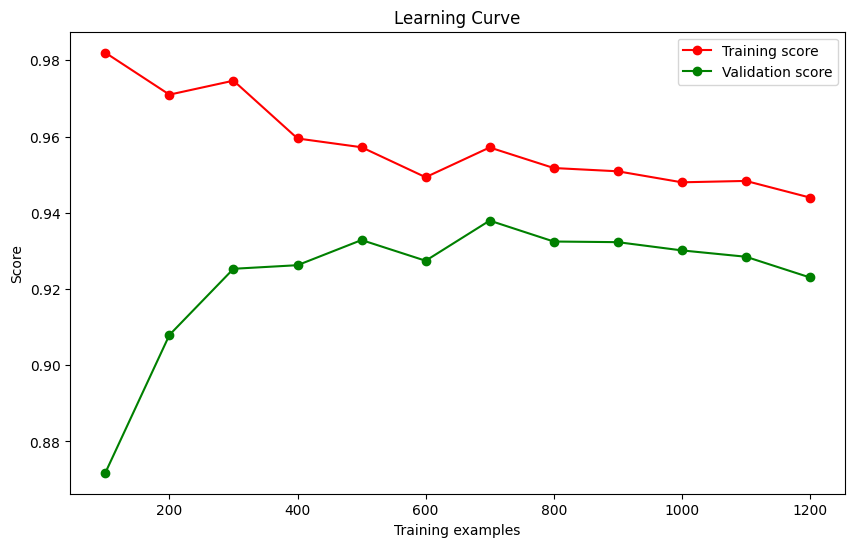

In [36]:
def calculate_learning_curve(model, X, y, train_sizes):
    train_sizes_abs, train_scores, test_scores = learning_curve(
        model, X, y, train_sizes=train_sizes, cv=5, scoring='accuracy')

    # Calculate mean training and test scores across CV folds
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    return train_sizes_abs, train_scores_mean, test_scores_mean

def plot_learning_curve(model, X, y, train_sizes):
    train_sizes_abs, train_scores_mean, test_scores_mean = calculate_learning_curve(model, X, y, train_sizes)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes_abs, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes_abs, test_scores_mean, 'o-', color="g", label="Validation score")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.title("Learning Curve")
    plt.legend(loc="best")
    plt.show()

# Plotting the curves to analyse model performance:
plot_learning_curve(rf_model_reg, x_train1_preprocessed, y_train1, [100,200,300,400,500,600,700,800,900,1000,1100,1200])


**Performance Analysis based on the above graph-**

*In the code above we have randomly picked up train_sizes to analyse how well the model in performing based on our selections. The above graph indicates that the model is exhibiting characteristics of a well-fitted model or a model that is* **"Just Right.**"

**Explanation-**

- **Initial Behavior**: *The fact that the validation curve initially starts at an almost 45-degree angle to the training curve suggests that the model is learning from the training data effectively. The validation performance improves as more data is provided, indicating that the model is capturing meaningful patterns in the data.*

- **Parallel Behavior**: *As the training size increases, the validation curve becomes parallel to the training curve. This behavior indicates that the model's performance on the validation data remains consistent even with increasing amounts of training data. The absence of significant divergence between the training and validation curves suggests that the model is generalizing well to unseen data.*

*Hence we can deduce that that the model is well-fitted to the data and is likely to generalize well to unseen data. Therefore we have curve which strikes a balance between underfitting and overfitting.*

In [37]:
import joblib

# Save Random Forest model
joblib.dump(rf_model_reg, 'random_forest_model.pkl')

# Save Gradient Boosting model
joblib.dump(gb_model_reg, 'gradient_boosting_model.pkl')


['gradient_boosting_model.pkl']

In [38]:
print(type(rf_model_reg))
print(type(gb_model_reg))


<class 'sklearn.ensemble._forest.RandomForestClassifier'>
<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>


# **Deployment**

In [39]:
!pip install fastapi
!pip install uvicorn
!pip install pickle5
!pip install pydantic
!pip install scikit-learn
!pip install requests
!pip install pypi-json
!pip install pyngrok
!pip install nest-asyncio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.1/132.1 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pickle5: filename=pickle5-0.0.11-cp310-cp310-linux_x86_64.whl size=255317 sha256=ca32e2a29c30fcc47ee15126cf273efdb52daaf2b5464b099f0803b731503ce5
  Stored in directory: /root/.cache/pip/wheels/7d/14/ef/4aab19d27fa8e58772be5c71c16add0426acf9e1f64353235c
Successfully built pickle5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.3/99.3 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.2/127.2 kB 19.9 MB/s eta 0:00:00


In [40]:
from fastapi import FastAPI
from pydantic import BaseModel
import pickle
import json
import uvicorn
from pyngrok import ngrok
from fastapi.middleware.cors import CORSMiddleware
import nest_asyncio

In [41]:
app = FastAPI()

In [42]:
origins = ["*"]

app.add_middleware(
    CORSMiddleware,
    allow_origins=origins,
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

In [43]:
import pickle
from fastapi import FastAPI, Request
from pydantic import BaseModel
from fastapi.responses import HTMLResponse

model = joblib.load('gradient_boosting_model.pkl')

print(model)
# Define a FastAPI app
app = FastAPI()

# Create a Pydantic model to represent the input data
class InputData(BaseModel):
    src_bytes : int
    dst_bytes : int
    logged_in : int
    count : int
    serror_rate : float
    srv_serror_rate : float
    rerror_rate : float
    srv_rerror_rate : float


# # Define a POST endpoint to make predictions
@app.post("/predict")
def predict(input_data: InputData):
    try:
        # Extract features from the input data
        src_bytes = input_data.src_bytes
        dst_bytes = input_data.dst_bytes
        logged_in = input_data.logged_in
        count = input_data.count
        serror_rate = input_data.serror_rate
        srv_serror_rate = input_data.srv_serror_rate
        rerror_rate = input_data.rerror_rate
        srv_rerror_rate = input_data.srv_rerror_rate


        # Make predictions using the loaded model
        prediction_value = model.predict([[src_bytes, dst_bytes, logged_in, count, serror_rate, srv_serror_rate, rerror_rate, srv_rerror_rate]])[0]  # Assuming your model is a classifier

        # Return the prediction as a JSON response
        return {"prediction": prediction_value}
    except Exception as e:
        # Handle any errors that occur during prediction
        return {"error": str(e)}

# Define a GET endpoint to serve the HTML file
@app.get("/", response_class=HTMLResponse)
async def read_index(request: Request):
    with open("/content/index.html", "r") as file:
        content = file.read()
    return HTMLResponse(content)

GradientBoostingClassifier(max_depth=5, random_state=42)


In [44]:
!ngrok authtoken 2e2udNMkspsZ401JoHdD4tmbQ8v_75Rgb2na3E7UyLkHp7MFp

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [45]:
ngrok_tunnel = ngrok.connect(8000)
print('Public URL:', ngrok_tunnel.public_url)
nest_asyncio.apply()
uvicorn.run(app, port=8000)

INFO:     Started server process [1030]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


Public URL: https://b4e6-34-106-14-248.ngrok-free.app
INFO:     122.171.19.193:0 - "GET / HTTP/1.1" 200 OK
INFO:     122.171.19.193:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     122.171.19.193:0 - "POST /predict HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [1030]


KeyboardInterrupt: 